In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the data set into python

In [3]:
Perf=pd.read_csv(r'D:\DSA - ICT\Week 6\Case study\StudentsPerformance.csv')

In [4]:
# Check the basic information in dataset

In [5]:
Perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
#Check the properties of the dataset

In [7]:
Perf.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


In [8]:
#Check the null values

In [9]:
Perf.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
#Question 1 - Count of Male and Female participated in test 

In [11]:
print("Count of gender wise participants in test is as below ")
Perf["gender"].value_counts().to_frame()

Count of gender wise participants in test is as below 


,gender
female,518
male,482


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


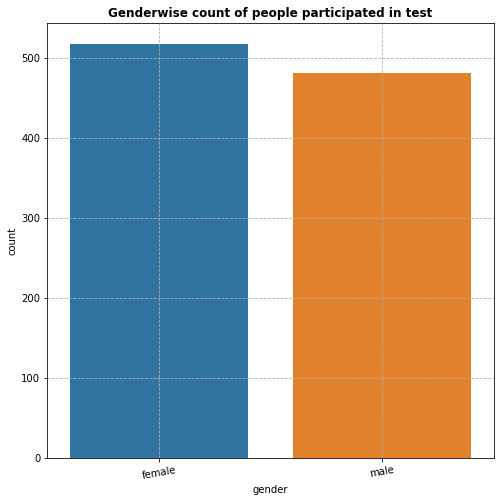

In [12]:
plt.figure(figsize=(8,8))
sns.countplot(Perf["gender"])
plt.title("Genderwise count of people participated in test",fontweight="bold")
plt.xticks(rotation=10)
plt.grid(linestyle='--')

In [13]:
#Question 2 - What do you think about the students' parental level of education?

In [14]:
PF=Perf["parental level of education"].value_counts()
print("Summary of parents level of Education is  as below \n")
PF.to_frame()

Summary of parents level of Education is  as below 



,parental level of education
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


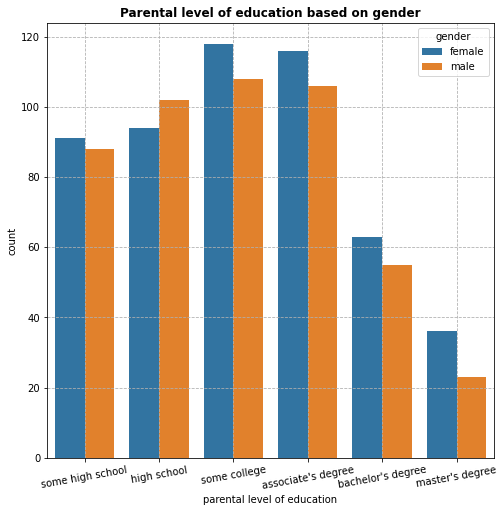

In [15]:
plt.figure(figsize=(8,8))
sns.countplot(Perf["parental level of education"],hue=Perf["gender"])
plt.title("Parental level of education based on gender",fontweight="bold")
plt.xticks(rotation=10)
plt.grid(linestyle='--')

Text(0.5, 1.0, 'Chart showing parental level of education ')

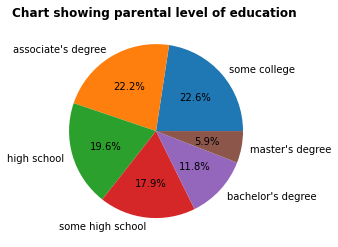

In [16]:
plt.pie(PF,labels=PF.index,autopct='%1.1f%%')
plt.title("Chart showing parental level of education ",fontweight="bold")

In [17]:
#The pie chart shows some college(22.6%) as higehst for parental level of education and lowest is master's degree(5.9%)
# From the count plot , we can see that male student parents are more in High school level of education
# Rest all level of education , female student's parents are more 
#Some collage and Associate's Degree have higher number than other cases- they constitute close to 45% of total

In [18]:
#Question 3 :Who scores the most on average for math, reading and writing based on Gender

In [19]:
Perf.groupby("gender")[["math score","reading score","writing score"]].mean()

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


In [20]:
#Based on Gender males score more on maths and Females score more on Reading and Writing when average scores are compared 

In [21]:
#Question 3 :Who scores the most on average for math, reading and writing based on Test Preparation score

In [22]:
Perf.groupby("test preparation course")[["math score","reading score","writing score"]].mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


In [23]:
#Based on test preparation course, completed people have higher average when compared with not completed ones
# So this means tose who have completed the course have got more marks 

In [24]:
#Question 4 :What do you think about the scoring variation for math, reading and writing based on Gender

In [25]:
Perf.groupby("gender")[["math score","reading score","writing score"]].std()

,math score,reading score,writing score
gender,,,
female,16.029928,14.411018,14.844842
male,14.556411,14.149594,14.227225


In [26]:
# From the above , we can see that the Standard Deviation based on gender is more for Female than male 
# this is because from the below we can see that min values in female scores are less than male 
#Hence range is higher and the variation is more than males 

In [27]:
Perf.groupby("gender").agg({"math score":["min","max","mean","median"],"reading score":["min","max","mean","median"],"writing score":["min","max","mean","median"]})

math score                        reading score                         \
              min  max       mean median           min  max       mean median   
gender                                                                          
female          0  100  63.376448   65.0            17  100  72.590734   73.0   
male           27  100  68.821577   69.0            23  100  65.545643   66.0   

       writing score                         
                 min  max       mean median  
gender                                       
female            10  100  72.467181   74.0  
male              15  100  63.446058   64.0

In [28]:
#Question 4 :What do you think about the scoring variation for math, reading and writing based on test preparation

In [29]:
Perf.groupby("test preparation course")[["math score","reading score","writing score"]].std()

,math score,reading score,writing score
test preparation course,,,
completed,14.521847,13.537572,13.236412
none,15.705689,14.608896,15.041667


In [30]:
#Standard Deviation based on level of preparation is more for none than completed 
#this is because from the below min values for none are less than completed
#Hence range higher for none and hence higher variability

In [31]:
Perf.groupby("test preparation course").agg({"math score":["min","max","mean","median"],"reading score":["min","max","mean","median"],"writing score":["min","max","mean","median"]})

math score                       reading score       \
                               min  max      mean median           min  max   
test preparation course                                                       
completed                       23  100  69.96648   70.0            37  100   
none                             0  100  63.78972   64.0            17  100   

                                          writing score                         
                              mean median           min  max       mean median  
test preparation course                                                         
completed                74.175978   75.0            36  100  74.684358   76.0  
none                     66.417445   67.0            10  100  64.457944   65.0

Text(0.5, 0.98, 'Histogram of marks by Female')

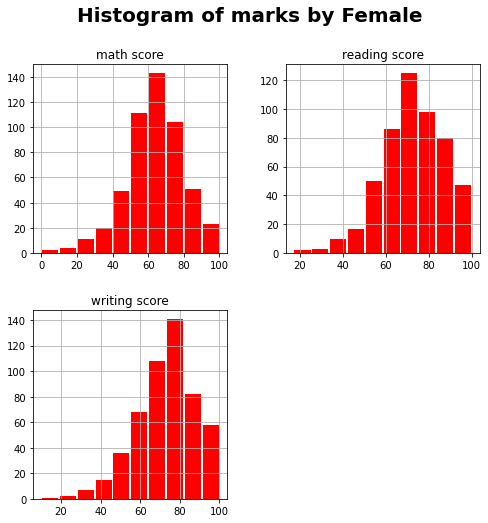

In [32]:
Perf[Perf["gender"]=="female"].hist(rwidth=0.9,color="red",figsize=(8,8))
plt.suptitle("Histogram of marks by Female",fontsize=20,fontweight="bold")

Text(0.5, 0.98, 'Histogram of marks by Male')

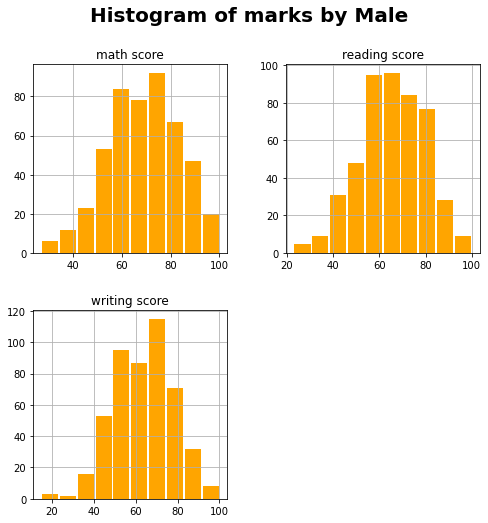

In [33]:
Perf[Perf["gender"]=="male"].hist(rwidth=0.9,color="orange",figsize=(8,8))
plt.suptitle("Histogram of marks by Male",fontsize=20,fontweight="bold")

Text(0.5, 0.98, 'Histogram of marks by Test preparation completed people')

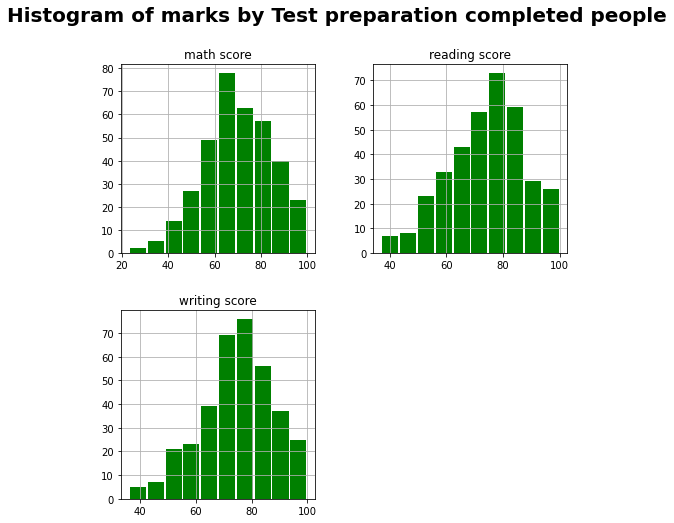

In [34]:
Perf[Perf["test preparation course"]=="completed"].hist(rwidth=0.9,color="green", figsize=(8,8))
plt.suptitle("Histogram of marks by Test preparation completed people",fontsize=20,fontweight="bold")

Text(0.5, 0.98, 'Histogram of marks by Test preparation not completed people')

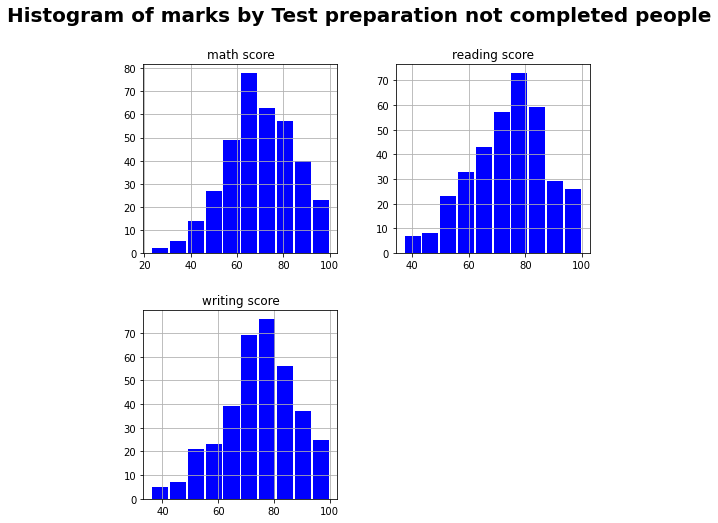

In [35]:
Perf[Perf["test preparation course"]=="completed"].hist(rwidth=0.9,color="blue", figsize=(8,8))
plt.suptitle("Histogram of marks by Test preparation not completed people",fontsize=20,fontweight="bold")

In [36]:
#All histogram above are left skewed and the mean is less than median 

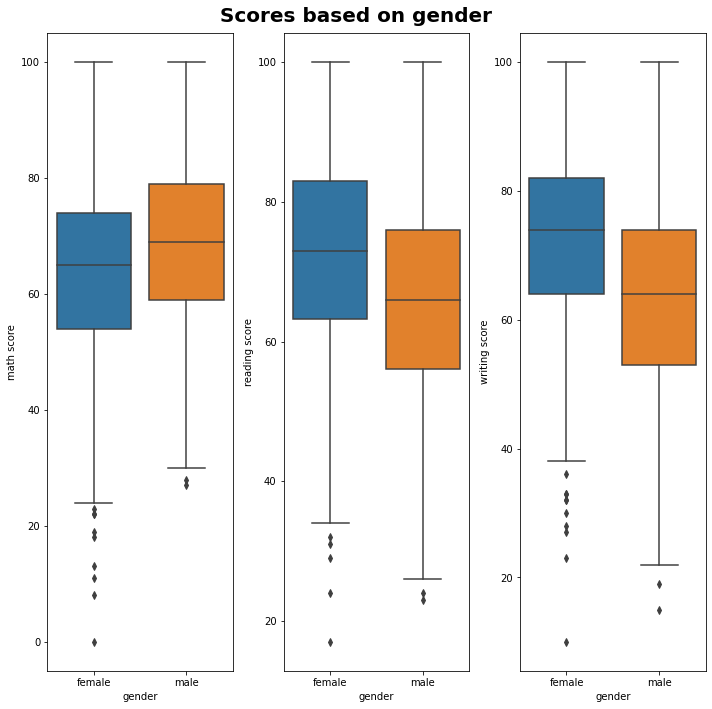

In [37]:
plt.figure(figsize=(10,10))
plt.suptitle("Scores based on gender",fontsize=20,fontweight="bold")

plt.subplot(1,3,1)
sns.boxplot(x="gender",y="math score",data=Perf)
plt.subplot(1,3,2)
sns.boxplot(x="gender",y="reading score",data=Perf)
plt.subplot(1,3,3)
sns.boxplot(x="gender",y="writing score",data=Perf)


plt.tight_layout()

In [38]:
#Above shows males score more on maths but for other two females score more than male
#Females score the lowest score in all 3 including a zero in maths 

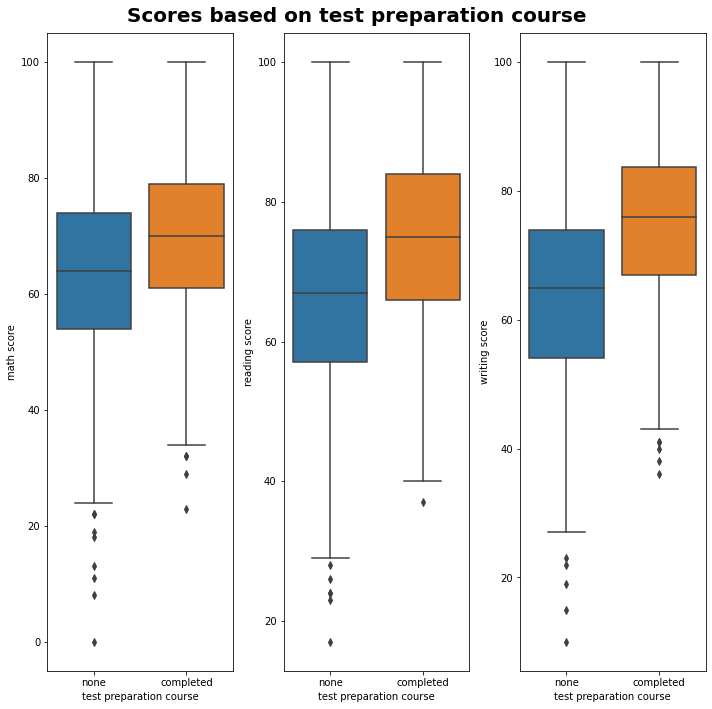

In [39]:
plt.figure(figsize=(10,10))
plt.suptitle("Scores based on test preparation course",fontsize=20,fontweight="bold")

plt.subplot(1,3,1)
sns.boxplot(x="test preparation course",y="math score",data=Perf)
plt.subplot(1,3,2)
sns.boxplot(x="test preparation course",y="reading score",data=Perf)
plt.subplot(1,3,3)
sns.boxplot(x="test preparation course",y="writing score",data=Perf)


plt.tight_layout()

In [40]:
#Above shows people who have completed the preparation course have scored better in all 3 .
#The lowest scores are scored by people who have not completed the course 
#This shows the reason why females have scored less marks than male as predominantly
#Females have not completed the test preparation course as compared to males 

In [41]:
#Question 5:The management needs your help to give bonus points to the top 25% of students based on their maths score, 
#so how will you help the management to achieve this.

In [42]:
Top25=Perf.sort_values(by="math score",ascending=False)
print("Top 25% students based on maths score are as per below table")
Top25.head(int(len(Top25)*25/100))

Top 25% students based on maths score are as per below table


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
856,male,group E,some high school,standard,completed,77,76,77
855,male,group E,associate's degree,free/reduced,completed,77,69,68
854,male,group D,some high school,standard,completed,77,68,69
853,male,group D,associate's degree,free/reduced,none,77,78,73
